In [454]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [455]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [456]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [457]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [458]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [459]:
#Get the total rides for each city type
total_ride_count_df = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count_df

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [460]:
#Get the total drivers for each city type
sum_drivers_by_type_df = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type_df

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [461]:
#Get the sum of the fares for each city type.
sum_fares_by_type_df = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type_df

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [462]:
# Combine the data into a single dataset
pyber_summary_data_df = pd.merge(total_ride_count_df, sum_drivers_by_type_df, how="left", on=["type"])

# Display the DataFrame
pyber_summary_data_df

,ride_id,driver_count
type,,
Rural,125,78
Suburban,625,490
Urban,1625,2405


In [463]:
# Combine the data into a single dataset
pyber_summary_data_df = pd.merge(pyber_summary_data_df, sum_fares_by_type_df, how="left", on=["type"])

# Display the DataFrame
pyber_summary_data_df

,ride_id,driver_count,fare
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [464]:
# Rename our columns
pyber_summary_data_df = pyber_summary_data_df.rename(columns={"ride_id":"Total Rides",
                                                              "driver_count":"Total Drivers",
                                                              "fare":"Total Fares"})


pyber_summary_data_df.index.name=None                                        

pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [465]:
# Create a new column called "Average fare per Ride" and divide total fare by total rides 
pyber_summary_data_df["Average Fare per Ride"] = pyber_summary_data_df["Total Fares"] / pyber_summary_data_df["Total Rides"]

# Create a new column called "Average Fare per Driver" and divide total fares by total drivers
pyber_summary_data_df["Average Fare per Driver"] = pyber_summary_data_df["Total Fares"] / pyber_summary_data_df["Total Drivers"]

pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [466]:
# Format the columns.
pyber_summary_data_df["Total Fares"] = pyber_summary_data_df["Total Fares"].map("${:,.2f}".format)


pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",34.623440,55.486282
Suburban,625,490,"$19,356.33",30.970128,39.502714
Urban,1625,2405,"$39,854.38",24.525772,16.571468


In [467]:
# Format the columns and finalize part 1
pyber_summary_data_df["Average Fare per Ride"] = pyber_summary_data_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_data_df["Average Fare per Driver"] = pyber_summary_data_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [468]:
# Display the DataFrame - begin Part 2
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [469]:
# Rename our columns
pyber_data_df = pyber_data_df.rename(columns={'city': 'City', 
                                              'date':'Date',
                                              'fare':'Fare', 
                                              'ride_id': 'Ride Id',
                                              'driver_count': 'No. Drivers', 
                                              'type':'City Type'})

pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [470]:
# Set Index to Date Column

pyber_data_df = pyber_data_df.set_index(["Date"])

pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [471]:
#Create new DataFrame using the copy() method {Date, City Type, Fare}

new_pyber_data_df = pyber_data_df.copy(deep=True)

new_pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [472]:
id(pyber_data_df)

2739642479560

In [473]:
id(new_pyber_data_df)

2739662334792

In [474]:
#Drop the extra Data columns

del new_pyber_data_df["City"]

new_pyber_data_df.head()

,Fare,Ride Id,No. Drivers,City Type
Date,,,,
2019-01-14 10:14:22,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [475]:
#Drop the extra Data columns

del new_pyber_data_df["Ride Id"]

new_pyber_data_df.head()

,Fare,No. Drivers,City Type
Date,,,
2019-01-14 10:14:22,13.83,5,Urban
2019-03-04 18:24:09,30.24,72,Urban
2019-02-24 04:29:00,33.44,57,Urban
2019-02-10 23:22:03,23.44,34,Urban
2019-03-06 04:28:35,34.58,46,Urban


In [476]:
#Drop the extra Data columns

del new_pyber_data_df["No. Drivers"]

new_pyber_data_df.head()

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban


In [477]:
#Check original DataFrame - all columns still present

pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [478]:
#Set the index to the datetime datatype

new_pyber_data_df.index = pd.to_datetime(new_pyber_data_df.index)

new_pyber_data_df.dtypes

Fare         float64
City Type     object
dtype: object

In [479]:
#Check the DataFrame using info() method to ensure datetime data typer on index

new_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [480]:
#Calculate the sum() of fares by the type of city and date using groupby() to create new DataFrame

sum_type_fare_df = new_pyber_data_df.groupby(["City Type", "Date"]).sum()["Fare"]

sum_type_fare_df

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [481]:
#Reset the index

sum_type_fare_df = sum_type_fare_df.reset_index(["Date"])

sum_type_fare_df

,Date,Fare
City Type,,
Rural,2019-01-01 09:45:36,43.69
Rural,2019-01-02 11:18:32,52.12
Rural,2019-01-03 19:51:01,19.90
Rural,2019-01-04 03:31:26,24.88
Rural,2019-01-06 07:38:40,47.33
...,...,...
Urban,2019-05-08 04:20:00,21.99
Urban,2019-05-08 04:39:49,18.45
Urban,2019-05-08 07:29:01,18.55


sum_type_fare_df

In [482]:
#Create a pivot table DataFrame with the Date as index and columns = City Type and fare for each date in each row

new_sum_type_fare_df = pd.pivot_table(data=sum_type_fare_df, index=["Date"], 
                                        columns=["City Type"],
                                        values=["Fare"]) 
                                        
                                        
  
new_sum_type_fare_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [483]:
#Create a new DataFrame on the given dates '2019-01-01':'2019-04-28' using loc

new_sum_type_fare_df.index = pd.to_datetime(new_sum_type_fare_df.index)
new_sum_type_fare_df =  new_sum_type_fare_df.sort_index(ascending=True)

new_pivot_df = new_sum_type_fare_df.loc[pd.Timestamp('2019-01-01'):pd.Timestamp('2019-04-30')]

new_pivot_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-29 20:54:19   NaN      NaN  28.41
2019-04-29 21:20:41   NaN      NaN  13.59
2019-04-29 22:08:22   NaN    25.75    NaN
2019-04-29 23:05:04   NaN      NaN  14.59
2019-04-29 23:10:18   NaN    29.39    NaN

[2218 rows x 3 columns]

In [484]:
#Create a new DataFrame from the pivot table DataFrame with resample(), and calculate the fares for each week

another_pivot_df = new_pivot_df.resample('7D').sum()

another_pivot_df

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-01  187.92   876.61  1879.70
2019-01-08  139.80  1080.40  2193.36
2019-01-15  233.85  1163.93  2105.90
2019-01-22  210.94  1285.13  1846.98
2019-01-29  361.50  1079.58  2085.77
2019-02-05   81.91   879.92  2200.85
2019-02-12  140.52  1394.86  2389.68
2019-02-19  448.07  1067.99  2156.88
2019-02-26   75.65   836.61  2619.82
2019-03-05  353.76   842.28  2240.19
2019-03-12  187.63  1096.89  1971.72
2019-03-19  126.07  1029.66  2495.15
2019-03-26  292.06  1061.82  1970.03
2019-04-02  453.42  1034.28  2101.04
2019-04-09  214.60   821.52  2579.51
2019-04-16  271.87  1144.27  2329.98
2019-04-23  201.72  1355.51  2241.85

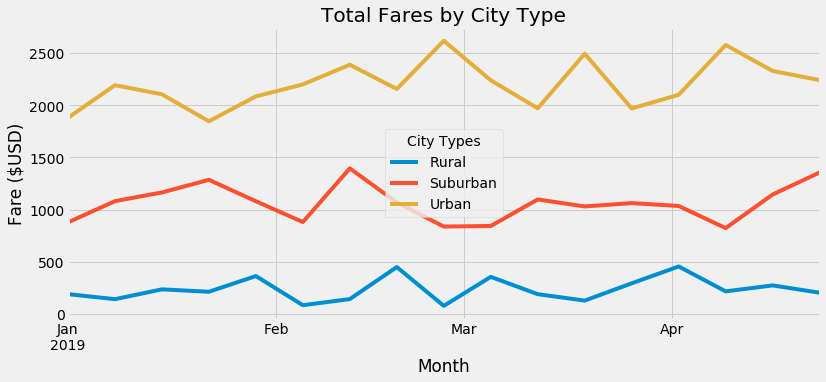

In [485]:
#Using the object-oriented interface method, plot the DataFrame you created in Step 12 using the df.plot() function.

plt.style.use('fivethirtyeight')

another_pivot_df.plot(kind="line", figsize=(12,5), title="Total Fares by City Type")


# Set textual properties
plt.ylabel("Fare ($USD)")
plt.xlabel("Month")
# Create a legend
lgnd = plt.legend(loc="center", title="City Types")
lgnd.get_texts()[0].set_text("Rural")
lgnd.get_texts()[1].set_text("Suburban")
lgnd.get_texts()[2].set_text("Urban")


# Save Figure
plt.savefig("analysis/Fig10.png")
# Show Figure
plt.show()
